#Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#Machine Learning

Ciencia de usar algoritmos para hallar patrones en los datos, obtener descriptores de nuestro dataset y hallar patrones.

Nuestros modelos solo seran tan buenos como lo sean nuestros datos.

Data: Dato en particular, singular

Features: Es como se describe, agrupa el dato que se tiene (genero, fecha)

Hacer uso de *histogramas* para ver la distribucion (valores +/- frecuentes) del dataset.

#Aprendizaje supervisado

###Regresion:

**Predecir un valor numerico** (salida) dada una variable de entrada.

####Regresion Lineal

Como metrica para medir el error del modelo se puede hacer uso de **R2**: que tan bien se ajusta la linea a los puntos.

#####Codigo

In [ ]:
from sklearn.linear_model import LinearRegression #importo regresion lineal
import random

In [ ]:
df = pd.read_csv("salarios.csv")
df.sample(5)

,Aexperiencia,Salario
14,2.0,17000
21,3.4,20000
25,10.0,42500
26,3.2,18300
22,5.3,27900


In [ ]:
print(f"max: {df.max()} min: {df.min()}")

max: Aexperiencia       10.0
Salario         42500.0
dtype: float64 min: Aexperiencia        1.0
Salario         15000.0
dtype: float64


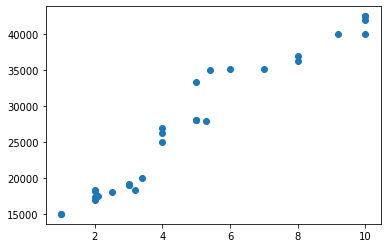

In [ ]:
plt.scatter(df["Aexperiencia"], df["Salario"])
plt.show()

In [ ]:
x = df["Aexperiencia"].values
x = x.reshape(len(x), 1) #el modelo espera que la x sea una matriz
y = df.iloc[:, 1].values
x[:5]

array([[10. ],
       [ 8. ],
       [ 5.4],
       [ 2.5],
       [ 1. ]])

In [ ]:
#separo los datos para entrenamiento y para prueba
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
#el modelo espera que la "x" sea bi-dimensional y la "y" unidimensional 
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

<function matplotlib.pyplot.show>

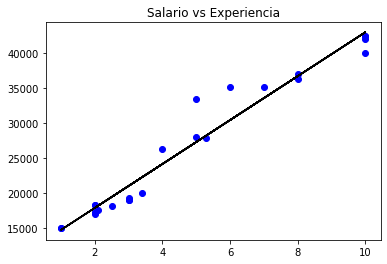

In [ ]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title("Entrenamiento")
plt.show

<function matplotlib.pyplot.show>

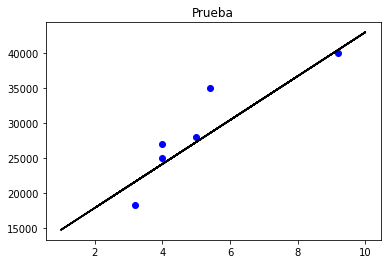

In [ ]:
plt.scatter(X_test, Y_test, color = "blue")
plt.plot(X_train, regressor.predict(X_train), color = "black")
plt.title("Prueba")
plt.show

In [ ]:
regressor.score(X_test, Y_test) #mirar el accuracy del modelo

0.7862437374732997

In [ ]:
paises = ["Argentina", "Paraguay", "Ecuador", "Bolivia", "Panama", "Brazil", "USA"]
df["Paises"] = [random.choice(paises) for i in range (0, len(df))]
df.head(5)

In [ ]:
df["Paises"].value_counts() #contar numero de apariencias de paises

Brazil       8
USA          6
Panama       5
Ecuador      5
Argentina    3
Paraguay     2
Bolivia      1
Name: Paises, dtype: int64

#####Proceso de decision

Diferentes parametros cambian la relacion que tiene X con Y (prediccion)

Y{pred} = w_1+w_0

w_1 es el cambio que resulta en Y al cambiar X
<br/>w_0 es el valor de Y si la X fuese cero<br/>

#####Funcion de coste

Lo que se trata de hacer es reducir la distancia de la linea a los puntos de datos reales, asi poder saber que tan lejos esta la linea de los valores.

#####Regla de actualizacion

Lo que quiere la regla es hallar los valores de w_1 y de w_0 que minimize la distancia de los puntos de datos a la linea.

###Clasificacion:

**Predecir un valor categorico** (salida) dada una variable de entrada.

####Regresion Logistica

Tratamos de hallar la linea que mejor separe clases diferentes. Encontrar parametros capaces de predecir cierta probabilidad. 

Trata de predecir la linea que mejor obtenga la probabilidad adecuada (que un estudiante gane el examen).

Una forma de medir el desempeño es mediante la matriz de confusion.

#####Funcion de coste

Predecir correctamente el procentaje de quienes pasan el filtro, y predecir correctamente el porcentaje de quienes no pasan el filtro.

#####Regla de actualizacion

Encontrar los valores o pesos que mejor separen a los datos.

#####Codigo

In [ ]:
from sklearn import metrics #metricas de precision del modelo
from sklearn.linear_model import LogisticRegression

In [ ]:
#importo el dataset de diabetes de GitHub
df = pd.read_csv("https://raw.githubusercontent.com/spuerta10/datasets/main/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
337,5,115,76,0,0,31.2,0.343,44,1
365,5,99,54,28,83,34.0,0.499,30,0
713,0,134,58,20,291,26.4,0.352,21,0
286,5,155,84,44,545,38.7,0.619,34,0
196,1,105,58,0,0,24.3,0.187,21,0


In [ ]:
y = df["Outcome"].values
df.drop(["SkinThickness", "Outcome"], axis = 1, inplace = True) #dropeamos SkinThickness

In [ ]:
#random state es para que cada vez que se parta, se parta de una forma aleatoria
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state = 0)

In [ ]:
logreg = LogisticRegression(max_iter = len(X_train))
logreg.fit(X_train, y_train)
y_predic = logreg.predict(X_test)
cnf_mat = metrics.confusion_matrix(y_test, y_predic) #matriz de confusion del modelo
cnf_mat

array([[142,  15],
       [ 34,  40]])

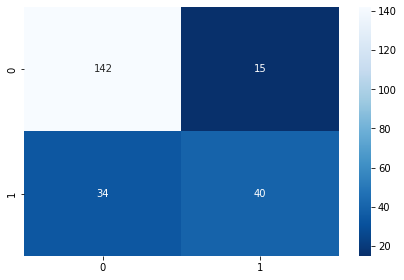

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
sns.heatmap(pd.DataFrame(cnf_mat), annot = True, cmap = "Blues_r", fmt = "g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_predic)
print(f"accuracy: {accuracy}")

accuracy: 0.7878787878787878


####Decision Trees

Uno de los clasificadores mas utilizados. 

No tener campos nulos, los campos nulos generan mucho ruido afectando a la division del arbol.

¿Como sabe cual es la variable que mejor separa los datos / como se divide el arbol?

1. Ganancia de informacion.
2. Dividir en arboles mas pequeños.

#####Codigo

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df_test = pd.read_csv("https://raw.githubusercontent.com/spuerta10/datasets/main/titanic/titanic-test.csv")
df_train = pd.read_csv("https://raw.githubusercontent.com/spuerta10/datasets/main/titanic/titanic-train.csv")

In [ ]:
df_train.isnull().sum() #contamos cuantos nulos tiene el df

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.50,C30,S
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.05,NaN,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.00,NaN,S
728,729,0,2,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.0,1,0,236853,26.00,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.65,NaN,S


In [ ]:
#Obtengo las distribuciones de hombres y mujeres que sobrevivieron
survived_m = df_train[(df_train["Survived"] == 1) & (df_train["Sex"] == "male")]
deceased_m = df_train[(df_train["Survived"] == 0) & (df_train["Sex"] == "male")]

#otra forma de hacerlo
survived_w = df_train["Sex"][(df_train["Survived"] == 1) & (df_train["Sex"] == "female")].value_counts()
deceased_w = df_train["Sex"][(df_train["Survived"] == 0) & (df_train["Sex"] == "female")].value_counts()

In [ ]:
#otra forma de hacerlo
women_data = df_train["Survived"][df_train["Sex"] == "female"].value_counts()
print(f"Sobrevivieron: {women_data[1]} mujeres") #mujeres que sobreviveron
print(f"Fallecieron: {women_data[0]} mujeres") #mujeres que no sobrevivieron

Sobrevivieron: 233 mujeres
Fallecieron: 81 mujeres


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


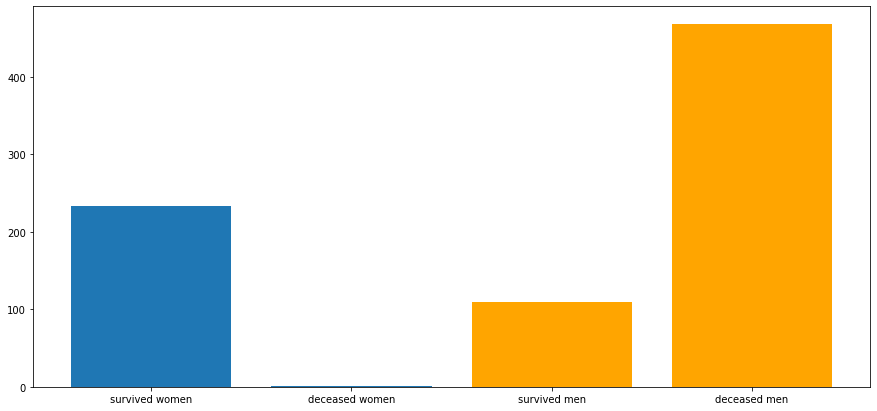

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(["survived women", "deceased women"], [survived_w, len(deceased_w)])
plt.bar(["survived men", "deceased men"], [len(survived_m), len(deceased_m)], color = "orange")
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder() 
#transformamos string de columna en variable categorica
encoder_sex = label_encoder.fit_transform(df_train["Sex"])
encoder_sex[:5]

array([1, 0, 0, 0, 1])

In [ ]:
#llenamos los datos nulos de Age por medio de la media
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")
df_train["Embarked"].value_counts() #valores unicos de la columna Embarked

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
outcome = df_train["Survived"].values
#dropeamos valores no utiles para el modelo
df_train.drop(["PassengerId", "Name", "Survived", "Ticket", "Cabin"], axis = 1, inplace = True)

In [ ]:
#obtengo el nombre de las columnas con variables categoricas
categorical_cols = [cname for cname in df_train.columns if
                   df_train[cname].nunique() < 10 and
                   df_train[cname].dtype == "object"]

categorical_cols

['Sex', 'Embarked']

In [ ]:
#obtengo el nombre de las columnas con variables numericas
numerical_cols = [cname for cname in df_train.columns if
                   df_train[cname].dtype in ["int64", "float64"]]

numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
cols = categorical_cols + numerical_cols

df_train = df_train[cols]
df_train.sample(3)

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
785,male,S,3,25.000000,0,0,7.25
669,female,S,1,29.699118,1,0,52.00
694,male,S,1,60.000000,0,0,26.55


In [ ]:
train_dummies = pd.get_dummies(df_train) #convertir variables String en variables categoricas
train_dummies

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_dummies, outcome, test_size = 0.3, random_state = 1) #separo el conjunto de datos para entrenamiento y prueba

In [ ]:
tree_ = tree.DecisionTreeClassifier()
tree_.fit(x_train, y_train) #entrenamiento del arbol
tree_.score(x_test, y_test) #accuracy del arbol

0.7425373134328358

####Random Forest (Decision Trees)

Filtran los datos separandolos de la mejor manera posible haciendo preguntas sobre los datos obtenidos.

En un random forest cada arbol "vota" por una respuesta.

Maxima profundidad: Numero de preguntas que hara el arbol para filtrar los datos.

En problemas de clasificacion usar la matriz de confusion como metrica de rendimiento, en casos de regresion usar MSE o R2 como metrica.

#####Funcion de coste

Hallar la mejor manera de dividir el conjunto de datos (hallar las mejores preguntas).

####Regla de actualizacion

Si el nodo hoja tiene mas de n_min(minimo numero de puntos de datos antes para partir el conjunto nuevamente) datos separa conjunto, si no, parar.

#Aprendizaje no supervisado

Encontrar estructuras, grupos, formas de agrupamiento de los datos.

###Clustering: Hallar grupos en los datos. 

####K-means

Situa centroides(puntos aleatorios para separar el dataset) los puntos que se encuentran mas cerca de determinado centroide perteneceran a ese subgrupo.

Calculando la media de los puntos de datos que pertencen a un centroide, podremos actualizar la posicion o valor del centroide, dando paso a nuevos centroides y repetir el proceso.

Valor K: numero de grupos en los que se quiere que se parta el dataset.

Para hallar la **mejor K** para un modelo calcular **inertia**: que tan cerca estan los puntos al centroide / **silhoutte score**: cuan separados estan los clusters en el espacio.

#####Funcion de coste

Como situar los centroides para que esten mas cerca de los datos, primero encontrar los centroides y luego modificarlos para reducir la distancia centroide - punto.

#####Codigo especies de plantas

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
df_iris = pd.read_csv("https://raw.githubusercontent.com/spuerta10/datasets/main/iris-flowers.csv")
df_iris.sample(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


<BarContainer object of 3 artists>

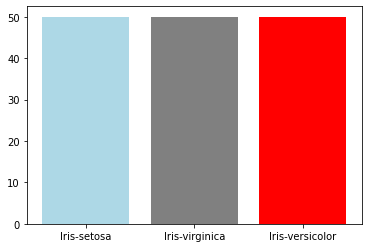

In [ ]:
count_species = df_iris["Species"].value_counts()
species = count_species.index.values
plt.bar(count_species.index.values, count_species.values, color = ["lightblue", "gray", "red"])

In [ ]:
print(df_iris["Species"].value_counts().index)
iris_versicolor = df_iris[df_iris["Species"] == "Iris-versicolor"]
iris_virginica = df_iris[df_iris["Species"] == "Iris-virginica"]
iris_setosa = df_iris[df_iris["Species"] == "Iris-setosa"]

Index(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype='object')


In [ ]:
iris_versicolor.sample(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor


In [ ]:
output_label = df_iris["Species"]
df_ = pd.DataFrame.copy(df_iris)
df_iris.drop(columns = ["Species"], inplace = True)

In [ ]:
output_label.value_counts().index.values

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

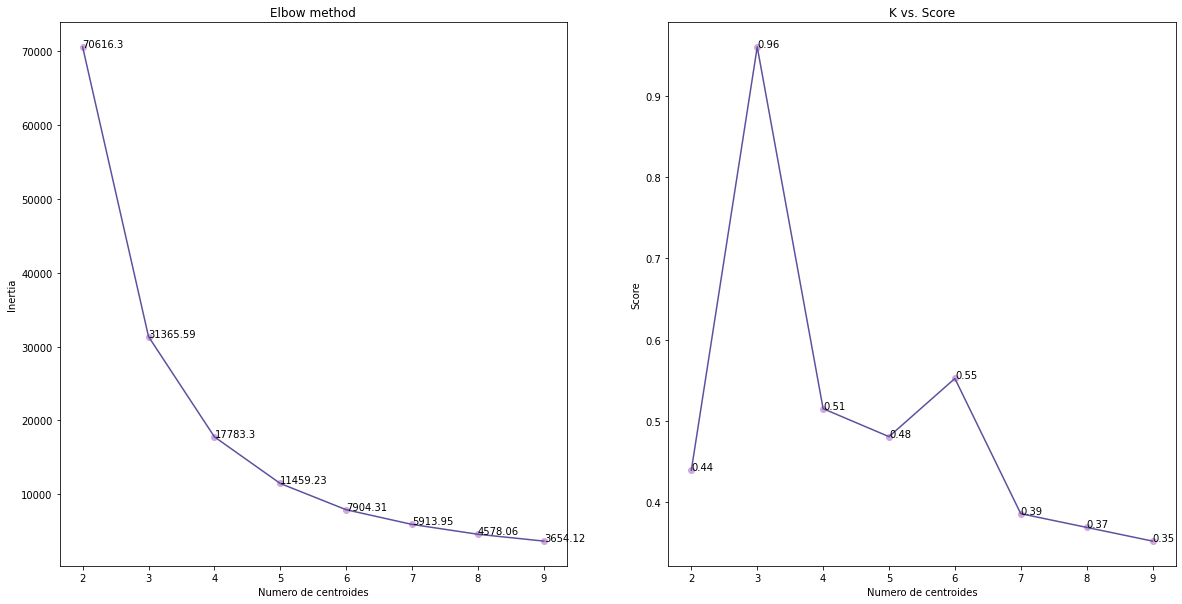

In [ ]:
# Grafica de codo
posible_ks = [i for i in range(2,10)]
model_inertia = []
model_scores = []

for i in  posible_ks:
  model = KMeans(n_clusters = i, max_iter = 1000)
  model.fit(df_iris)
  prediction = model.predict(df_iris)
  inertia = model.inertia_
  score = metrics.adjusted_rand_score(output_label, prediction)
  model_inertia.append(inertia)
  model_scores.append(score)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))
ax1.scatter(posible_ks, model_inertia, color = "#d1aadc")
ax1.plot(posible_ks, model_inertia, color = "#5e509e")
ax1.set_title("Elbow method")
ax1.set(xlabel = "Numero de centroides", ylabel = "Inertia")
ax2.scatter(posible_ks, model_scores, color = "#d1aadc")
ax2.plot(posible_ks, model_scores, color = "#5e509e")
ax2.set_title("K vs. Score")
ax2.set(xlabel = "Numero de centroides", ylabel = "Score")
for i in range(0, len(model_inertia)):
  ax1.annotate(round(model_inertia[i],2), (posible_ks[i], model_inertia[i]))
  ax2.annotate(round(model_scores[i],2), (posible_ks[i], model_scores[i]))

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 1000) #escogemos el mejor k 
kmeans.fit(df_iris)
predictions = kmeans.predict(df_iris)
df_["Predictions"] = predictions
score = metrics.adjusted_rand_score(df_["Species"], df_["Predictions"])

In [ ]:
print(df_[["Species", "Predictions"]][df_["Species"] == "Iris-setosa"].sample(1))
print(df_[["Species", "Predictions"]][df_["Species"] == "Iris-virginica"].sample(1))
print(df_[["Species", "Predictions"]][df_["Species"] == "Iris-versicolor"].sample(1))

        Species  Predictions
16  Iris-setosa            1
            Species  Predictions
128  Iris-virginica            2
            Species  Predictions
62  Iris-versicolor            0


In [ ]:
def predicted_colors(element):
  if element == 0:
    return "#ab74b5" #color de iris-setosa
  elif element == 1:
    return "#344067" #color de iris-versicolor
  return "#65578b" #color iris-virginica

In [ ]:
df_["Colors"] = df_["Predictions"].apply(predicted_colors)
df_[["Species", "Predictions", "Colors"]].sample(5)

,Species,Predictions,Colors
14,Iris-setosa,1,#344067
96,Iris-versicolor,0,#ab74b5
97,Iris-versicolor,0,#ab74b5
90,Iris-versicolor,0,#ab74b5
49,Iris-setosa,1,#344067


Text(0.5, 1.0, 'Model Prediction \n Score: 1.0')

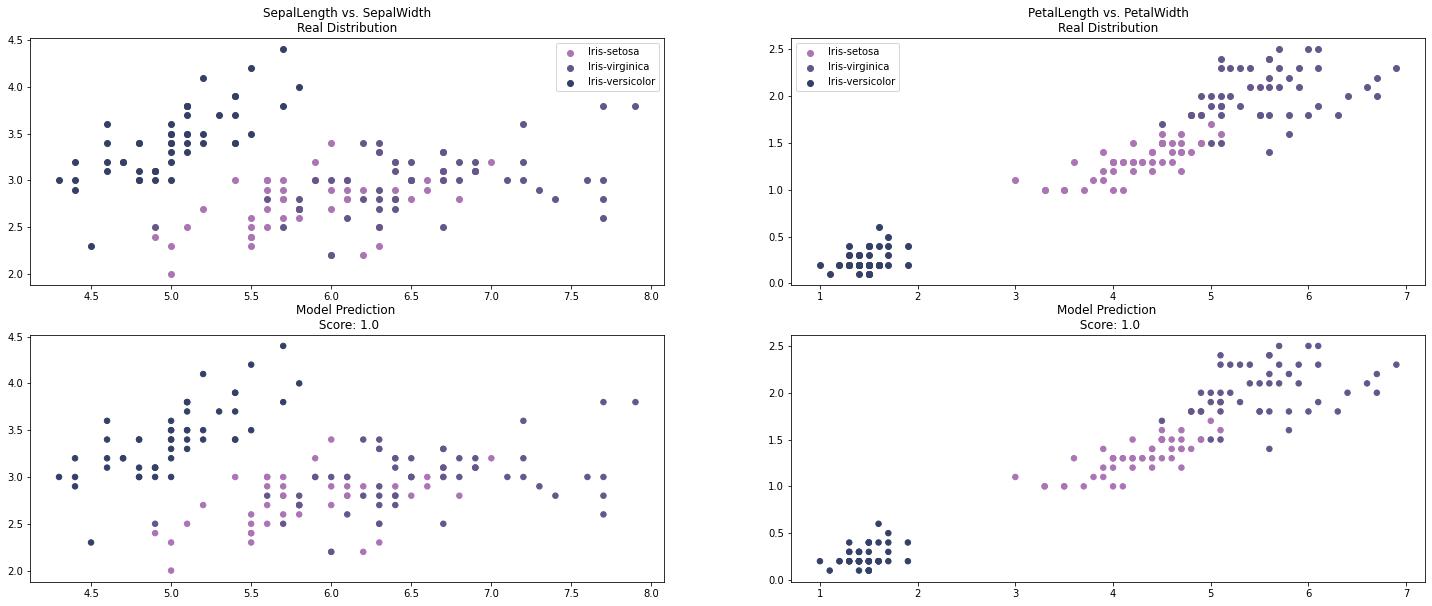

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(25,10))
axs[0,0].scatter(iris_versicolor["SepalLengthCm"], iris_versicolor["SepalWidthCm"], color = "#ab74b5")
axs[0,0].scatter(iris_virginica["SepalLengthCm"], iris_virginica["SepalWidthCm"], color = "#65578b")
axs[0,0].scatter(iris_setosa["SepalLengthCm"], iris_setosa["SepalWidthCm"], color = "#344067")
axs[0,0].set_title("SepalLength vs. SepalWidth\nReal Distribution")
axs[0,0].legend(species)
axs[0,1].scatter(iris_versicolor["PetalLengthCm"], iris_versicolor["PetalWidthCm"], color = "#ab74b5")
axs[0,1].scatter(iris_virginica["PetalLengthCm"], iris_virginica["PetalWidthCm"], color = "#65578b")
axs[0,1].scatter(iris_setosa["PetalLengthCm"], iris_setosa["PetalWidthCm"], color = "#344067")
axs[0,1].set_title("PetalLength vs. PetalWidth\nReal Distribution")
axs[0,1].legend(species)
axs[1,0].scatter(df_iris["SepalLengthCm"], df_iris["SepalWidthCm"], c = df_["Colors"], s= 30)
axs[1,0].set_title(f"Model Prediction \n Score: {score}")
axs[1,1].scatter(df_iris["PetalLengthCm"], df_iris["PetalWidthCm"], c = df_["Colors"], s= 30)
axs[1,1].set_title(f"Model Prediction \n Score: {score}")

#####Codigo vinos

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [ ]:
vinos = datasets.load_wine()
df_vinos = pd.DataFrame(vinos.data, columns = vinos.feature_names)
df_vinos["type"] = vinos.target 
df_vinos.sample(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0,0


In [ ]:
df_vinos["type"].value_counts() #ver datos unicos

1    71
0    59
2    48
Name: type, dtype: int64

In [ ]:
corr_mat = df_vinos.corr() #matriz de correlacion para saber que variable esta relacionada con el tipo de vino
corr_mat[corr_mat.loc[:,:] > 0] #columnas donde la correlacion sea mayor a 0

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
alcohol,1.000000,0.094397,0.211545,NaN,0.270798,0.289101,0.236815,NaN,0.136698,0.546364,NaN,0.072343,0.643720,NaN
malic_acid,0.094397,1.000000,0.164045,0.288500,NaN,NaN,NaN,0.292977,NaN,0.248985,NaN,NaN,NaN,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,NaN,0.003911,0.223626,NaN
alcalinity_of_ash,NaN,0.288500,0.443367,1.000000,NaN,NaN,NaN,0.361922,NaN,0.018732,NaN,NaN,NaN,0.517859
magnesium,0.270798,NaN,0.286587,NaN,1.000000,0.214401,0.195784,NaN,0.236441,0.199950,0.055398,0.066004,0.393351,NaN
total_phenols,0.289101,NaN,0.128980,NaN,0.214401,1.000000,0.864564,NaN,0.612413,NaN,0.433681,0.699949,0.498115,NaN
flavanoids,0.236815,NaN,0.115077,NaN,0.195784,0.864564,1.000000,NaN,0.652692,NaN,0.543479,0.787194,0.494193,NaN
nonflavanoid_phenols,NaN,0.292977,0.186230,0.361922,NaN,NaN,NaN,1.000000,NaN,0.139057,NaN,NaN,NaN,0.489109
proanthocyanins,0.136698,NaN,0.009652,NaN,0.236441,0.612413,0.652692,NaN,1.000000,NaN,0.295544,0.519067,0.330417,NaN
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,NaN,NaN,0.139057,NaN,1.000000,NaN,NaN,0.316100,0.265668


In [ ]:
type1 = df_vinos[df_vinos["type"] == 0]
type2 = df_vinos[df_vinos["type"] == 1]
type3 = df_vinos[df_vinos["type"] == 2]
type2.sample(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.6,1.05,2.65,450.0,1
102,12.34,2.45,2.46,21.0,98.0,2.56,2.11,0.34,1.31,2.8,0.80,3.38,438.0,1


In [ ]:
df_ = df_vinos.drop(columns = ["type"])
scaler = StandardScaler()
scaler.fit(df_)
df_scaled = pd.DataFrame(scaler.transform(df_), columns = df_.columns)
df_scaled.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
30,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.713598
82,-1.137207,-1.082894,0.524480,1.352801,-1.526548,-0.472868,-0.451052,0.307374,-0.334471,-1.236324,1.546759,0.152988,-0.372246
160,-0.791333,1.340796,0.049285,0.451946,-0.824415,0.007832,-1.113670,1.113154,-0.965221,1.121183,-1.743745,-1.457197,-0.722540
113,-1.964835,-1.432983,0.487926,0.451946,-0.824415,0.296251,-0.019346,0.468530,-0.264388,-0.855662,0.625418,-0.426113,-0.996407
53,0.950391,-0.391694,1.145888,-0.719166,1.071345,1.129464,0.763748,0.226796,0.156113,0.537213,0.757038,0.449601,2.000202


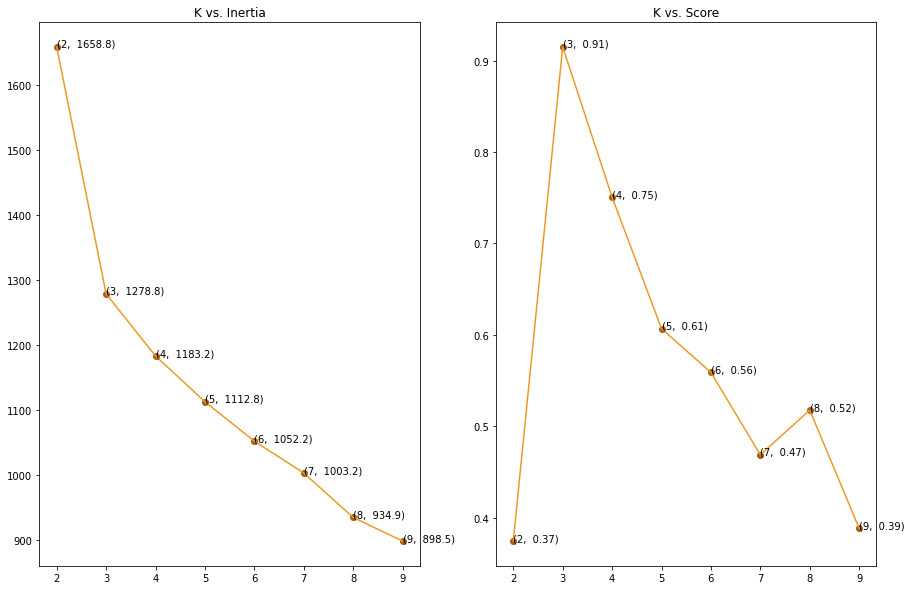

In [ ]:
# Grafica de codo
ks_number = [i for i in range(2,10)]
model_inertia = []
model_score = []

for i in ks_number:
  model = KMeans(n_clusters = i, max_iter = 1000)
  model.fit(df_scaled)
  prediction = model.predict(df_scaled)
  score = metrics.adjusted_rand_score(df_vinos["type"], prediction)
  model_score.append(score)
  model_inertia.append(model.inertia_)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.scatter(ks_number, model_inertia, color = "#a75f17")
ax1.plot(ks_number, model_inertia, color = "#eb9a25")
ax1.set_title("K vs. Inertia")
ax2.scatter(ks_number, model_score, color = "#a75f17")
ax2.plot(ks_number, model_score, color = "#eb9a25")
ax2.set_title("K vs. Score")

for i in range(0,len(ks_number)):
  ax1.annotate(f"({ks_number[i]},  {round(model_inertia[i],1)})", (ks_number[i], model_inertia[i]))
  ax2.annotate(f"({ks_number[i]},  {round(model_score[i],2)})", (ks_number[i], model_score[i]))

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(df_scaled)
prediction = kmeans.predict(df_scaled)
score = metrics.adjusted_rand_score(df_vinos["type"], prediction)
df_scaled["Prediction"] = prediction

In [ ]:
def predictions_color(element):
  if element == 0:
    return "#7f3562"
  elif element == 1:
    return "#c04e8c"
  return "#562347"

In [ ]:
df_scaled["Color"] = df_scaled["Prediction"].apply(predictions_color) 
pd.concat([df_vinos["type"],df_scaled[["Prediction", "Color"]]], axis = 1).sample(5)

,type,Prediction,Color
111,1,2,#562347
63,1,2,#562347
76,1,2,#562347
52,0,0,#7f3562
4,0,0,#7f3562


Text(0.5, 1.0, 'Predicted dsitribution \nScore: 0.9')

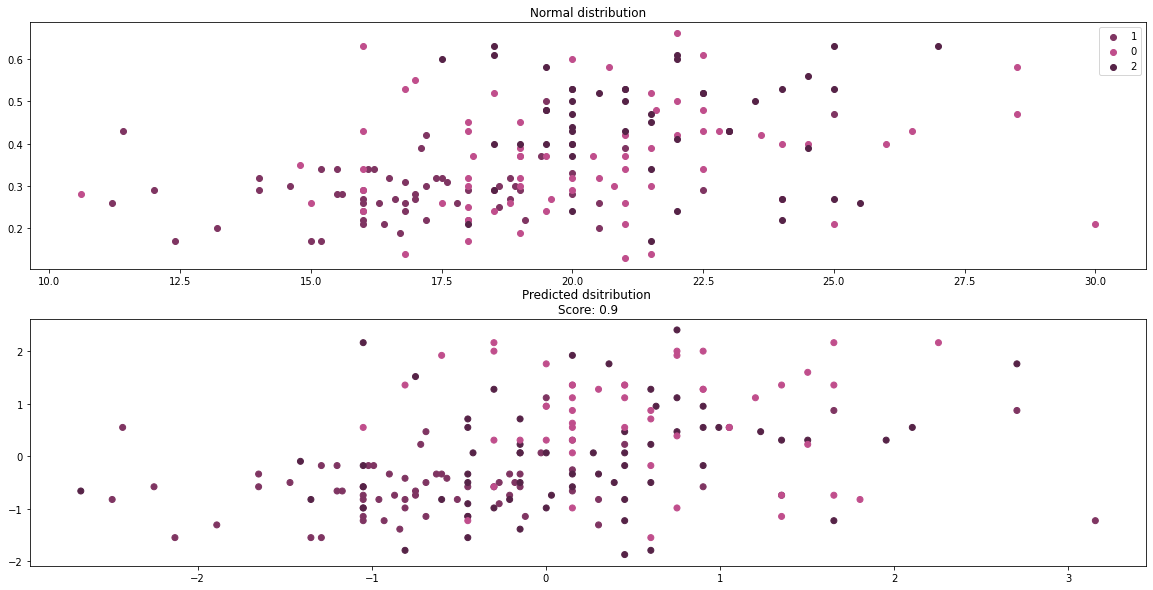

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (20,10))
ax1.scatter(type1["alcalinity_of_ash"], type1["nonflavanoid_phenols"], color = "#7f3562")
ax1.scatter(type2["alcalinity_of_ash"], type2["nonflavanoid_phenols"], color = "#c04e8c")
ax1.scatter(type3["alcalinity_of_ash"], type3["nonflavanoid_phenols"], color = "#562347")
ax1.set_title("Normal distribution") #fila, columna
ax1.legend(df_vinos["type"].value_counts().index.values)
ax2.scatter(df_scaled["alcalinity_of_ash"], df_scaled["nonflavanoid_phenols"], c = df_scaled["Color"])
ax2.set_title(f"Predicted dsitribution \nScore: {round(score, 2)}") # fila,columna

In [ ]:
#metodo de envoltura para seleccion de caracteristicas
df_.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

####Regla de actualizacion

Se actualiza hasta que: 
1. Los centroides no cambian mucho de posicion <br/>
2. Los puntos no cambian de cluster. 

###Reduccion de dimensionalidad: Hallar los features que mejor describen a los diferentes grupos.

¿Cual es el subgrupo mas pequeño de features que me pueden predecir algo? Hallar features que mas ayudan a la hora de una prediccion. 

####PCA

####T-SNE

#Procesos de modelos de ML

*Proceso de decision:* Como se hace una prediccion haciendo uso de los parametros.

*Funcion de coste:* Saber si los parametros en el modelo generar buenas predicciones.

*Regla de actualizacion:* Como mejorar parametros para mejorar predicciones.

##Particiones del dataset

Training: 60% - 80%
<br/>Validation: 0% - 20%
<br/>Testing: 0% - 20%<br/>

##¿Por que **normalizar**?

Se normalizan los datos, especificamente los numericos, para que el modelo no tenga problemas con la estabilidad numerica. Tambien para que el modelo pueda ver los valores en un contexto similar.

*Estabilidad numerica:* Que tan facil es para el modelo usar las reglas de actualizacion. 

##¿Cuando **normalizar**?

Se debe de normalizar cuando estamos trabajando con datos que miden cosas distintas las cuales no puedan ser comparadas entre si.

#Redes Neuronales

##¿Que son?

La **capa de entrada** toma los datos y se los da a una **capa oculta**: operaciones y funciones que modelan una pregunta compleja (¿Podemos clasificar la imagen de un gato?); la **capa de salida** nos da la prediccion o respesta.

Cada nodo o neurona se comunica mediante un borde o conexion, estas indican la fuerza de la relacion entre nodos.

Cada neurona de la capa de entrada tiene un peso (w) en su conexion con cada neurona de la capa oculta, hallando estos pesos podemos saber si la relacion es mas o menos fuerte.

Cada neurona de la capa oculta pasa el valor obtenido de las capas anteriores si es que este valor (peso) es positivo.

Clasificacion: Funcion Softmax muy usada; solo da intervalo de 0 y 1s.

**Deep Learning** es agregar agregar neuronas a lo largo y/o ancho de la capa oculta.

##Tipos

Deep Feed-Forward:Hacen uso de funciones de activacion y son buenas en resolver funciones complejas no lineales

Convolucional:Tiene mecanismos de agrupacion y son muy buenas a la hora de predecir motivos y escala (imagenes, audio)


Divide la informacion de manera consecutiva (divide aprendizaje en pequeñas areas), enfocandose en ciertas secciones.

Recurrente: Recordar una serie o secuencia larga (PLN).

##Entrenamiento

En ppio preprocesar los datos

###Regla de decision

Es un calculo de avance; se parte desde la capa de entrada y se llega a la capa de salida.

##¿Como mejorarlas?

Para prevenir el sobre ajuste se puede hacer uso de dropout: mientras se esta entrenando pone en cero algunos nodos ocultos, bloque de info para que el modelo no tengo info suficiente como para poder memorizar. 

**Deep Learning** Trata de econtrar similitudes, formas, patrones en los datos.

Para poder aprender se necesita una funcion de activacaion ReLU.

##Codigo

In [ ]:
# clasificacion de imagenes
import tensorflow as tf #biblioteca
from tensorflow import keras #modelo

In [ ]:
df_fashion = keras.datasets.fashion_mnist
#dividir dataset entre entrenamiento y pruebas
(train_images, train_labels), (test_images, test_labels) = df_fashion.load_data()

In [ ]:
#etiquetas con las que se clasificaran las imagenes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
train_images.shape #60000 imagenes divididas de a 28 x 28 pixeles

(60000, 28, 28)

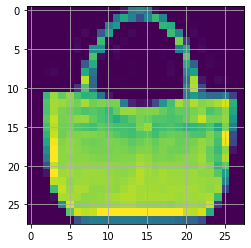

In [ ]:
#visualizacion de datos
plt.figure()
plt.imshow(train_images[100]) #traigo la imagen 100
plt.grid(True)

In [ ]:
#normalizacion de los pixeles para que tengan un rango entre 0 y 1
train_images = train_images / 255.0 
test_images = test_images / 255.0

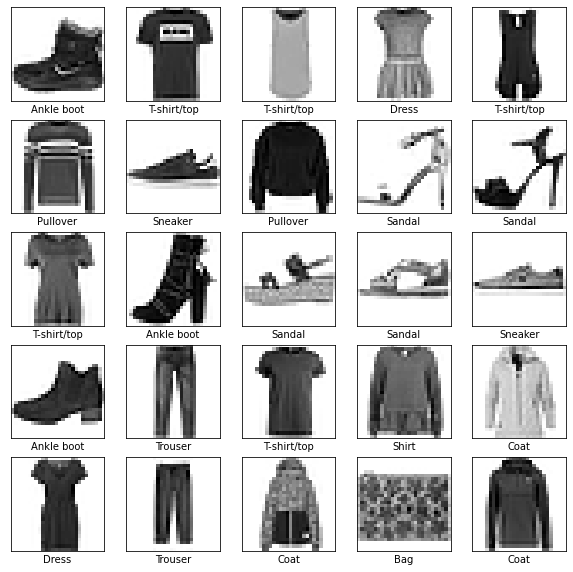

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25): #numero de imagenes a mostrar
  plt.subplot(5,5,i +1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])


In [ ]:
#creacion de la red neuronal
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(), 
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])


In [ ]:
model.fit(train_images, train_labels, epochs = 10) #numero de iteraciones para entrenar

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4831 - accuracy: 0.8384
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4751 - accuracy: 0.8413
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4666 - accuracy: 0.8440
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4627 - accuracy: 0.8453
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4513 - accuracy: 0.8495
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4464 - accuracy: 0.8521
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4424 - accuracy: 0.8509
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4369 - accuracy: 0.8536
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4469 - accuracy: 0.8505
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.438

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accuracy: {test_acc}") 

313/313 [==============================] - 1s 2ms/step - loss: 0.5969 - accuracy: 0.8124
Accuracy: 0.8123999834060669


In [ ]:
#asignacion de etiquetas del modelo
